# Exploring Hacker News Posts

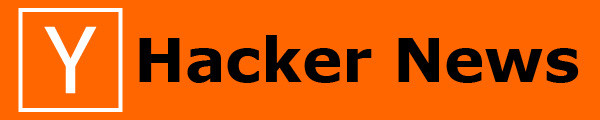


Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of the Hacker News listings can get hundreds of thousands of visitors as a result.

The dataset has been reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that did not receive any comments, and then randomly sampling from the remaining submissions.

We're specifically interested in posts whose titles begin with either Ask HN or Show HN. Users submit Ask HN posts to ask the Hacker News community a specific question.

We'll compare these two types of posts to determine the following:

    * Do Ask HN or Show HN receive more comments on average?
    * Do posts created at a certain time receive more comments on average?

In [3]:
from csv import reader
import datetime as dt
import inspect as i

open_file = open("hacker_news.csv")
read_file = reader(open_file)
#assigning dataset from the hacker_news.csv to list of lists: hn
hn = list(read_file)
print(hn[0:5])

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']] 



In [4]:
#Storing the header row in list: headers
headers = hn[0:1]
print(headers)

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']]


In [5]:
#List of lists cleaned to contain all data except the header
hn = hn[1:]
print(hn[0:5])

[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'], ['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12']]


Determining the posts starting with "Ask HN", "Show HN" and others

The lists below will be used to store the rows where the title matches one of the above 3 criteria: ask_posts, show_posts, other_posts

In [8]:
#Lists Initialisation
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]
    title = title.lower()
    if (title.startswith("ask hn")):
        ask_posts.append(row)
    elif (title.startswith("show hn")):
        show_posts.append(row)
    else:
        other_posts.append(row)
print('Number of ask_posts: '+str(len(ask_posts)))
print('Number of Show_posts: '+str(len(show_posts)))
print('Number of other posts: '+str(len(other_posts)))

Number of ask_posts: 1744
Number of Show_posts: 1162
Number of other posts: 17194


In [9]:
print(ask_posts[0:5])

[['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55'], ['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43'], ['11610310', 'Ask HN: Aby recent changes to CSS that broke mobile?', '', '1', '1', 'polskibus', '5/2/2016 10:14'], ['12210105', 'Ask HN: Looking for Employee #3 How do I do it?', '', '1', '3', 'sph130', '8/2/2016 14:20'], ['10394168', 'Ask HN: Someone offered to buy my browser extension from me. What now?', '', '28', '17', 'roykolak', '10/15/2015 16:38']]


Next, let's determine if ask posts or show posts receive more comments on average. Before we do that, lets change the type for comments from str to int

In [10]:
print(type(ask_posts[0][4]))
for row in ask_posts:
    var = row[4]
    row[4] = int(var)
print(type(ask_posts[0][4]))

print(type(show_posts[0][4]))
for row in show_posts:
    var = row[4]
    row[4] = int(var)
print(type(show_posts[0][4]))

<class 'str'>
<class 'int'>
<class 'str'>
<class 'int'>


In [11]:
def averagecomments(listname, commentindex = 4):
    total_comments = 0
    sum_comments = 0
    for row in listname:
        numcomments = row[commentindex]
        if numcomments > 0:
            total_comments += 1
            sum_comments += numcomments
    avg_comments = sum_comments/total_comments
    return(avg_comments)

avg_ask_comments = averagecomments(ask_posts,4)
avg_show_comments = averagecomments(show_posts,4)
print("{} Comments are {}".format("Average Ask HN", avg_ask_comments))
print("{} Comments are {}".format("Average Show HN", avg_show_comments))

Average Ask HN Comments are 14.038417431192661
Average Show HN Comments are 10.31669535283993


From the dataset, as evidenced, titles starting with "Ask HN" has an average of 14 comments. Articles starting with "Show HN" has an average of 10 comments. As such Ask HN articles have higher average comments in general.

In [12]:
#Creating a frequency table to store comments received for the posts created at each hour of day:

#Below Dictionary to store the hour as key and comments received as value
comments_by_hour = {}

#Below Dictionary to store the hours as keys and number of ask posts created as values
counts_by_hour = {}

for row in ask_posts:
    created_at = row[-1]
    created_at = dt.datetime.strptime(created_at,"%m/%d/%Y %H:%M")
    hour = created_at.time()
    hour = created_at.strftime("%H")
    if hour not in comments_by_hour:
        comments_by_hour[hour] = row[4]
        counts_by_hour[hour] = 1
    else:
        comments_by_hour[hour] += row[4]
        counts_by_hour[hour] += 1
        
print("Counts by Hour \n", counts_by_hour)
print("Comments by Hour \n", comments_by_hour)

Counts by Hour 
 {'09': 45, '13': 85, '10': 59, '14': 107, '16': 108, '23': 68, '12': 73, '17': 100, '15': 116, '21': 109, '20': 80, '02': 58, '18': 109, '03': 54, '05': 46, '19': 110, '01': 60, '22': 71, '08': 48, '04': 47, '00': 55, '06': 44, '07': 34, '11': 58}
Comments by Hour 
 {'09': 251, '13': 1253, '10': 793, '14': 1416, '16': 1814, '23': 543, '12': 687, '17': 1146, '15': 4477, '21': 1745, '20': 1722, '02': 1381, '18': 1439, '03': 421, '05': 464, '19': 1188, '01': 683, '22': 479, '08': 492, '04': 337, '00': 447, '06': 397, '07': 267, '11': 641}


##### Calculation for the average number of comments per post for posts created during each hour of the day.

In [13]:
# List declaration
avg_comments_per_hourly_post = []
total_comments = 0
#Logic to populate avg_comments_per_hourly_post which will hold
#average number of comments for posts created during each hour of the day
for row in comments_by_hour:
    num_comments = int(comments_by_hour[row])
    num_posts = int(counts_by_hour[row])
    # avg_comments_per_hourly_post list of lists will hold the average comments, hour to make it easier to sort
    avg_comments_per_hourly_post.append([num_comments/num_posts, row])
print(avg_comments_per_hourly_post)    

[[5.5777777777777775, '09'], [14.741176470588234, '13'], [13.440677966101696, '10'], [13.233644859813085, '14'], [16.796296296296298, '16'], [7.985294117647059, '23'], [9.41095890410959, '12'], [11.46, '17'], [38.5948275862069, '15'], [16.009174311926607, '21'], [21.525, '20'], [23.810344827586206, '02'], [13.20183486238532, '18'], [7.796296296296297, '03'], [10.08695652173913, '05'], [10.8, '19'], [11.383333333333333, '01'], [6.746478873239437, '22'], [10.25, '08'], [7.170212765957447, '04'], [8.127272727272727, '00'], [9.022727272727273, '06'], [7.852941176470588, '07'], [11.051724137931034, '11']]


###### Now applying sorting on the list to display the top 5 hours where the average comments received were the highest

In [15]:
avg_comments_per_hourly_post = sorted(avg_comments_per_hourly_post,reverse = True)

print("Top 5 Hours for Ask Posts Comments")
for row in avg_comments_per_hourly_post[0:5]:
    comments = int(row[1])
    row[1] = comments
    print("Created at {}:00 Hours : Average Comments Received {:.2f}".format(row[1],row[0]))

Top 5 Hours for Ask Posts Comments
Created at 15:00 Hours : Average Comments Received 38.59
Created at 2:00 Hours : Average Comments Received 23.81
Created at 20:00 Hours : Average Comments Received 21.52
Created at 16:00 Hours : Average Comments Received 16.80
Created at 21:00 Hours : Average Comments Received 16.01
